<div style="border:solid green 2px; padding: 20px">
<b>Юрий, привет!</b>

Меня зовут Евгений Д., и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [29]:
#имортируем библиотек, читаем файл и выводим общую информацию.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Рекомендую не применять метод `print()` для вывода таблиц. Лучше импортировать в
начале проекта метод `display` из библиотеки `IPython.display` и
применять его:

---
    
`from IPython.display import display`

`display(df)`

    
</div>

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Данных достаточно много. Присутствуют пропущенные значения. В некоторых столбцах неправильный тип данных.

### Шаг 2. Предобработка данных

In [31]:
#ищем пропущенные значение используя метод isnull()
print (data.isnull().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [32]:
#выводим кол-во дубликатов
print (data.duplicated().sum())


0


In [33]:
#Заполняем пропущенные значения
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print(data['kitchen_area'].isna().sum())

data['floors_total'] = data['floors_total'].fillna(1)


data['is_apartment']=data['is_apartment'].fillna(True) 
data['balcony']=data['balcony'].fillna(0)

     

living_area_coef=data['living_area']/data['total_area']
living_area_mean = np.mean(living_area_coef)
living_area_fill = living_area_mean*data['living_area']
data['living_area'] = data['living_area'].fillna(living_area_fill)
data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()


median_data = data.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)
median_data_localities = list(median_data.index)

def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in median_data_localities:
        return median_data.loc[locality][col]
    
    return row[col]
columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    data.loc[data[column].isnull(), column] = data.apply(fill_missing_data, axis=1, args=(column,))

# Проверим данные по скольким населенные пунктам не удалось заполнить
len(data[data['cityCenters_nearest'].isnull()]['locality_name'].unique())


# Проверим данные по скольким населенные пунктам не удалось заполнить
len(data[data['cityCenters_nearest'].isnull()]['locality_name'].unique())

#Переводим в нужный формат день публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#Приводим данные к нужному типу
# float63 -> int64
for column in ['balcony', 'floors_total', 'days_exposition']:
    data[column] = data[column].astype('int')


print (data.isnull().sum())

0
0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5394
cityCenters_nearest      5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего не делать такие объемные ячейки, т.к. они достаточно трудно изучаются и также тяжело будет изучаться моя обратная связь.
    
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

In [34]:
#Соотношения
data['living_to_total']=data['living_area']/data['total_area']
data['kitchen_to_total']=data['kitchen_area']/data['total_area']
data['price_m'] = data['last_price']/data['total_area']

#День недели, месяц и год

data['day_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#Функция категоризирующая этажи по группам "Первый" "Последний" "Другой"
def categorize_floor(row):


    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
    
data.loc[:, 'floor'] = data.apply(categorize_floor, axis=1)
    
    
data['floor'].value_counts()



другой       17446
последний     3336
первый        2917
Name: floor, dtype: int64

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_m,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,другой,True,...,482.0,2.0,755.0,95,0.472222,0.231481,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,первый,True,...,NaN,0.0,NaN,81,0.460396,0.272277,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,другой,True,...,90.0,2.0,574.0,558,0.612500,0.148214,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,другой,True,...,84.0,3.0,234.0,424,NaN,0.057233,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,другой,True,...,112.0,1.0,48.0,121,0.320000,0.410000,100000.000000,1,6,2018


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

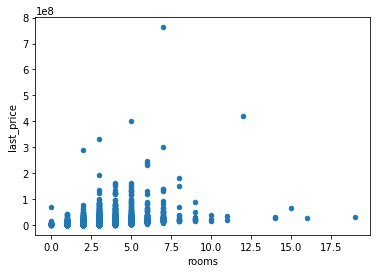

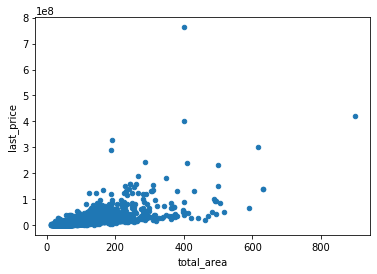

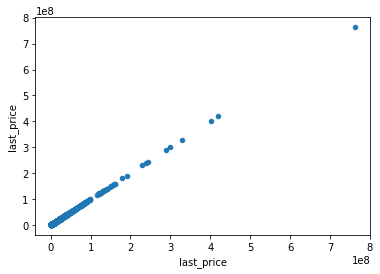

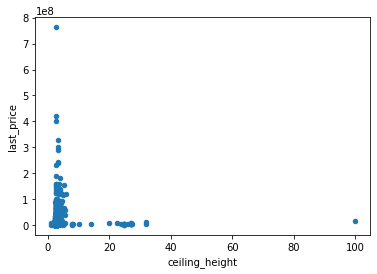

In [36]:
#Строю гистограммы неочищенных данных циклом for
scatter_columns = ['rooms','total_area','last_price','ceiling_height']
for column in scatter_columns:
    data.plot(x=column, y='last_price', 
              kind='scatter')

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

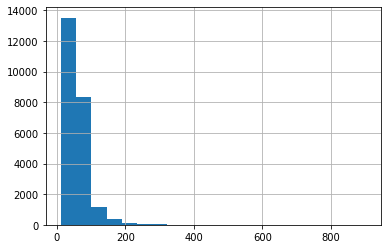

In [37]:
#Строим гистограмму для площади
data['total_area'].hist(bins=20)
data['total_area'].describe()



<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

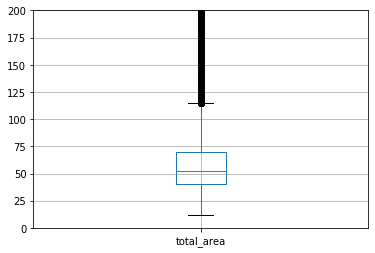

In [38]:
#строим диаграмму размаха
plt.ylim(0, 200)
data.boxplot('total_area')
plt.show()

Первый квартиль находится на уровне 40 m2
Нижний "ус" упирается в 12, минимальное значение.
Верхний "ус" упирается в значение около 115 кв.м.
Большая часть значений лежит в диапазоне до 70 m2.

Все, что лежит за примерной границей нормального размаха, мы можем посчитать выбросом.
Из этого можно сделать вывод, что нам нужен диапазон 12-115 m2.

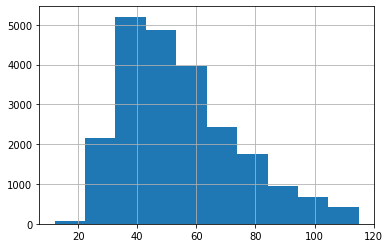

In [39]:
# Строим гистрограмму со срезом больше 12 и меньше 115
data.query('total_area >= 12 and total_area <= 115')['total_area'].hist()
plt.show()

In [40]:
#Описываем информацию столбца last_price
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

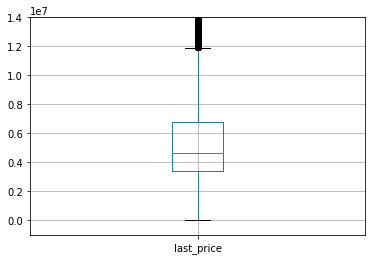

In [41]:
#Строим гистограмму для цены, подгоняя значения по y для удобного просмотра
plt.ylim(-1e+06, 1.4e+07)
data.boxplot('last_price')
plt.show()

Из полученного можем сделать вывод, что первый квартиль находится на уровне 3.4 млн. Большая часть значений находится в диапазоне 7 млн.
Нижний "ус" упирается в 0, когда минимум равен 12 190, в то время как средняя стоимость недвижимости – 6.5 млн, что может вызвать у нас подозрения. Рассмотрим их подробнее

In [42]:
anomaly_data_price = data.query('last_price < 4.5e+5')
anomaly_data_price.sort_values('last_price').head()[['locality_name', 'last_price', 'total_area']]



,locality_name,last_price,total_area
8793,Санкт-Петербург,12190.0,109.0
14911,посёлок станции Свирь,430000.0,54.0
17456,Сланцы,430000.0,30.4
16274,деревня Старополье,440000.0,40.0


Для деревень стоимость в 430 тыс. нормальна. Для Санкт-Петербурга стоимость в 12,190 - аномальна. Для того, чтобы избежать этого, нужно установить границу в 430 тыс.

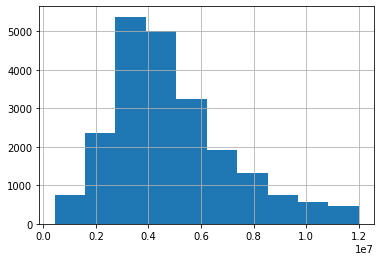

In [43]:
# Данные без выбросов и ошибок
data.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price'].hist()
plt.show()

In [44]:
#Переходим к числу комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

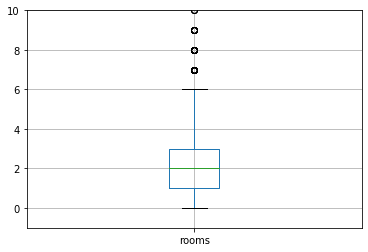

In [45]:
#Строим диаграмму размаха
plt.ylim(-1, 10)
data.boxplot('rooms')
plt.show()

Исходя из данной диаграммы, можем сделать вывод, что большая часть значений лежит в диапазоне до 3х комнат, что выглядит правдаподобно. Первый квартиль находится на уровне 1 комнаты. Нижний "ус" упирается в 0, минимальное значение, это можно принять, за ошибку в данных. Верхний "ус" упирается в значение около 6.
Выбросы лежат за ориентировочной границей нормального распределения.

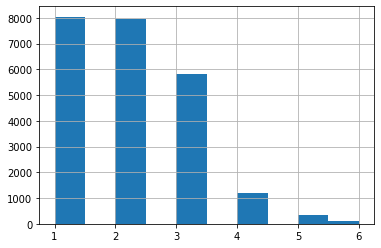

In [46]:

# Срез данных от 1 до 6
data.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.show()



<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Давай постараемся автоматизировать построение графиков через цикл `for`. 
    
Почему это важно? 
    
- экономим своё время
- оптимизируем код
- делаем работу презентабельнее
    
Выбери любой участок кода где это сделать целесообразнее всего. </s>

</div>
<div class="alert alert-info"> <b>Комментарий студента:</b> Построил графики с "грязными данными" в начале этого пункта. Использовал цикл for, как посоветовал.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: (2)</b>

Отлично 👍
    
Теперь в нужный момент сможем применить этот инструмент 😊
    
</div>

In [20]:
#Описываем столбец с высотой потолков
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

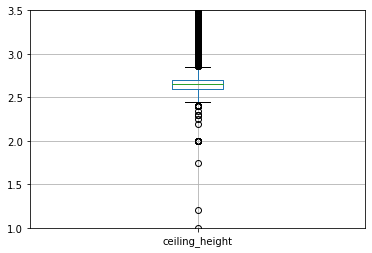

In [19]:
#Строим диаграмму размаха для высоты потолков
plt.ylim(1, 3.5)
data.boxplot('ceiling_height')
plt.show()

Исходя из построенной диаграммы, можно сделать вывод, что большая часть значений лежит в диапазоне до 2.8 м комнат, что выглядит правдаподобно. Первый квартиль находится на уровне 2.5 м. Нижний "ус" упирается в границу 2.2 м. Верхний "ус" упирается в границу около 3.2 м.

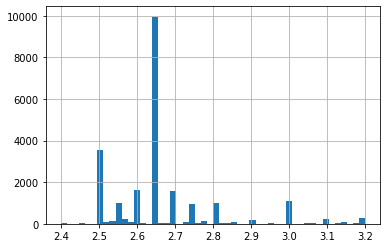

In [28]:

# Строим диаграмму по срезу высоты потолков от 2.4 до 3.2
data.query('ceiling_height >= 2.4 and ceiling_height <= 3.2')['ceiling_height'].hist(bins=50)
plt.show()

In [21]:
#описываем кол-во дней продажи квартиры
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

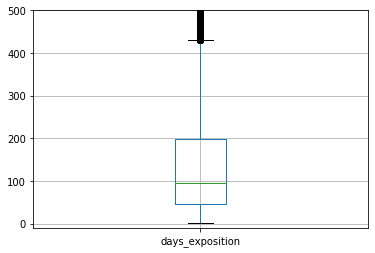

In [22]:
#Строим диаграмму размаха для кол-во дней продажи квартиры
plt.ylim(-10, 500)
data.boxplot(column='days_exposition')
plt.show()

Исходя из диаграммы размаха, можно сделать вывод, что большая часть значений лежит в диапазоне до 200 дней, что выглядит правдоподобно.
Первый квартиль лежит на уровне 45 дней.
Нижний ус упирается в 1, минимальное значение. 
Верхний заканчивается в около 430 дней. Обычно продажа занимает около 100 дней. По диаграмме видно, если объект продан в течение 50 дней – это необычайно быстро, либо собственник передумал продавать квартиру и снял объявление с публикации. В таком случае будем рассматривать временной промежуток от недели.

 Изучим факторы влияющие на продажу квартиры:

In [23]:
#Так как мы уже провели очистку данных, то будем использовать наши срезы
total_area_query = 'total_area >= 12 and total_area <= 115'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'rooms >= 1 and rooms <= 6'
ceiling_height_query = 'ceiling_height >= 2.4 and ceiling_height <= 3.2'
days_exposition_query = 'days_exposition >= 7 and days_exposition <= 430'

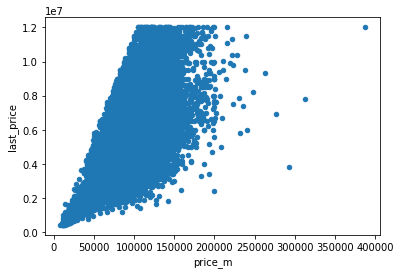

In [24]:
#Зависимость стоимости недвижимости от цены квадратного метра
clean_data_query = f'{total_area_query} and {last_price_query}'
clean_data = data.query(clean_data_query)
clean_data.plot(x='price_m', y='last_price', kind='scatter')
plt.show()

In [25]:
#Считаю корреляцию
clean_data['price_m'].corr(clean_data['last_price'])

0.6312384710845483

Исходя из полученного коэф. корреляции, можно сделать вывод, что связь, между изменением цены за кв.м и стоимостью самой недвижимости присутствует.

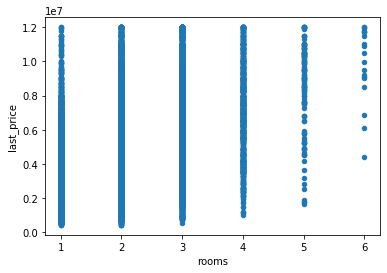

In [26]:
#Зависимость стоимости недвижимости от числа комнат
clean_data_query = f'{rooms_query} and {last_price_query}'
clean_data = data.query(clean_data_query)
clean_data.plot(x='rooms', y='last_price', kind='scatter')
plt.show()


In [27]:
#Считаю корреляцию
clean_data['rooms'].corr(clean_data['last_price'])

0.45206215582459547

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе можно было построить матрицу корреляции между всеми переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

Исходя из полученного графика, можно сделать вывод, что связь между кол-вом комнат и стоимостью недвижимости присутствует, но она не особо сильна, по сравнению с другими показателями.

In [28]:
#Зависимость стоимости недвижимости от этажа.

data[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price')

,last_price
floor,
другой,5.072145e+06
первый,4.160474e+06
последний,4.533718e+06


По полученной сводной таблице, можно сделать вывод, что первый этаж является самым дешевым, а средний самым популярным.

In [29]:
#Зависимость стоимости недвижимости от расстояние до центра города (м)

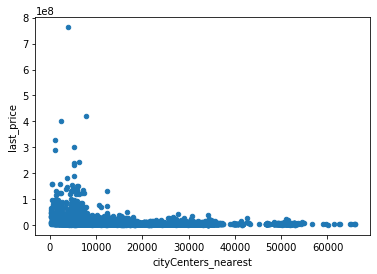

In [30]:
clean_data = data.query(last_price_query)
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [31]:
#Высчитываем коэф.корреляции
clean_data['cityCenters_nearest'].corr(clean_data['last_price'])

-0.35229906519828047

Исходя из полученного графика, можно сделать вывод, что цена увеличивается по тому, насколько близко находится квартира к центру. Чем ближе к центру - тем выше цена. Большая часть из всех дорогих объектов находится именно в центре.

In [32]:
#Зависимость стоимости недвижимости от даты публикации объявления
clean_data = data.query(f'{days_exposition_query} and {last_price_query}')

In [33]:
clean_data[['day_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()

,day_exposition,month_exposition,year_exposition,last_price
day_exposition,1.000000,0.010180,-0.013679,-0.012430
month_exposition,0.010180,1.000000,-0.305183,0.004125
year_exposition,-0.013679,-0.305183,1.000000,0.028693
last_price,-0.012430,0.004125,0.028693,1.000000


Исходя из полученных данных, можно сделать вывод, о том что зависимости между датой публикации и стоимостью недвижимости нет.

In [34]:
#Выбираю 10 населённых пунктов с наибольшим числом объявлений.
top10_localities = data['locality_name'].value_counts().head(10)

In [35]:
top10_locality_names = list(top10_localities.index)

In [36]:
(
    data.query(f'locality_name in @top10_locality_names and {last_price_query}')
    .pivot_table(index='locality_name', values='price_m')
    .sort_values(by='price_m', ascending=False)
)

,price_m
locality_name,
Санкт-Петербург,105628.948318
Пушкин,100322.823868
деревня Кудрово,92409.726322
посёлок Парголово,90175.913458
посёлок Мурино,85752.189195
посёлок Шушары,78677.364217
Колпино,75185.478229
Гатчина,68421.902770
Всеволожск,67214.252635


Исходя из полученной таблицы, стоимость квадратного метра в Санкт-Петербурге самая дорогая. В городе Выборг, самая дешевая.

In [37]:
#Проанализируем недвижимость в Санкт-Петерубрге
#Выбираем из общего датасета, всю недвижимость города
saint_petersburg = pd.DataFrame(data.loc[data['locality_name'] == "Санкт-Петербург"])
saint_petersburg.reset_index()
len(saint_petersburg)

15721

In [38]:
#Теперь, нужно выяснить, какая область входит в центр.
#Для того, чтобы это сделать, создадим новый столбец и округлим до целых полученные в нем значения, как и требуется в плане.
km = 1_000
saint_petersburg['cityCenters_nearest_km'] = (saint_petersburg['cityCenters_nearest'] / km).astype('int')

In [39]:
#Средняя цена для каждого км
spb_prices = saint_petersburg.query(last_price_query)
spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,8.429409e+06
1,8.396685e+06
2,7.721342e+06
3,7.598287e+06
4,7.856875e+06
5,7.446107e+06
6,6.887989e+06
7,6.765614e+06
8,6.353700e+06


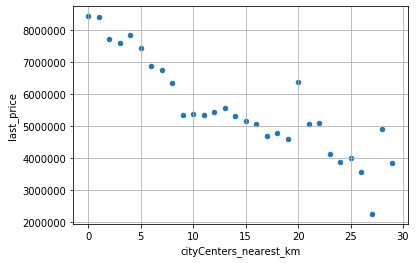

In [40]:
#График, показывающий зависимость цены от удаленности
(
    pd.DataFrame(spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True)
)
plt.show()

В нашем случае, график меняется на границе в 7 км. Обозначим это как центральную зону.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно да, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

In [41]:
#Выделяем квартиры в центре через срез
apartments_in_center = pd.DataFrame(spb_prices.query('cityCenters_nearest_km <= 7'))
len(apartments_in_center)

2503

In [42]:
#проанализируем площадь в центре
apartments_in_center.query(total_area_query)['total_area'].describe()

count    2402.000000
mean       64.638318
std        21.137366
min        12.000000
25%        47.100000
50%        63.050000
75%        79.797500
max       115.000000
Name: total_area, dtype: float64

In [43]:
#проанализируем цену в центре
apartments_in_center['last_price'].describe()

count    2.503000e+03
mean     7.502496e+06
std      2.262249e+06
min      1.600000e+06
25%      5.800000e+06
50%      7.400000e+06
75%      9.150000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [44]:
#проанализируем число комнат в центре
apartments_in_center.query(rooms_query)['rooms'].describe()

count    2486.000000
mean        2.376508
std         1.038415
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [45]:
#проанализируем высоту потолков в центре
apartments_in_center.query(ceiling_height_query)['ceiling_height'].describe()

count    2155.000000
mean        2.782172
std         0.198337
min         2.400000
25%         2.650000
50%         2.650000
75%         3.000000
max         3.200000
Name: ceiling_height, dtype: float64

Средняя площадь 63 кв.м. Средняя цена 7.5 млн. руб. Больше объявлений по двушкам и трешкам. Средняя высота потолков почти 2.8 м.

In [46]:
#Давайте разберемся, какие факторы влияют на стоимость квартиры
#Добавим критерии, для того, чтобы максимально объективно проанализировать чистые данные по квартирам в Санкт-Петербурге
clean_data_query = f'{total_area_query} and {rooms_query} and {ceiling_height_query} and {days_exposition_query}'
clean_data = apartments_in_center.query(clean_data_query)


In [47]:
columns = [
    'last_price',
    'cityCenters_nearest_km',
    'total_area',
    'rooms',
    'ceiling_height',
    'day_exposition',
    'month_exposition',
    'year_exposition'
]

clean_data[columns].corr().sort_values('last_price', ascending=False)

,last_price,cityCenters_nearest_km,total_area,rooms,ceiling_height,day_exposition,month_exposition,year_exposition
last_price,1.000000,-0.143463,0.702623,0.437698,0.150980,0.018105,-0.009621,0.057615
total_area,0.702623,-0.176720,1.000000,0.791482,0.190267,-0.018728,0.026316,-0.068927
rooms,0.437698,-0.162037,0.791482,1.000000,0.175667,-0.017738,0.036363,-0.037910
ceiling_height,0.150980,-0.156005,0.190267,0.175667,1.000000,-0.049601,-0.046390,0.105891
year_exposition,0.057615,0.027318,-0.068927,-0.037910,0.105891,0.008188,-0.304691,1.000000
day_exposition,0.018105,0.025879,-0.018728,-0.017738,-0.049601,1.000000,0.042020,0.008188
month_exposition,-0.009621,-0.007513,0.026316,0.036363,-0.046390,0.042020,1.000000,-0.304691
cityCenters_nearest_km,-0.143463,1.000000,-0.176720,-0.162037,-0.156005,0.025879,-0.007513,0.027318


In [48]:
# Проанализируем зависимость этажа и стоимости квартиры.
clean_data.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,6.257843e+06
последний,7.256400e+06
другой,7.472445e+06


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом на графиках, для наглядности наших расчетов.
    
</div>

Ожидаемо, что ситуация в Санкт-Петербурге такая же с ценой по этажам, как и в других городах. Первый самый дешевый. Самые дорогие от первого до последнего.

### Шаг 5. Общий вывод

Исходя из проделанной работы можно сделать вывод, что недвижимость, которая расположена ближе к центру всегда дороже. Анализируя общую картину, недвижимость в Петербурге, дороже чем в остальных городах из датасета. Из общих факторов, влияющих на стоимость квартиры можно выделить кол-во комнат, площадь и высоту потолков. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
Достаточно детально проделанный проект и это не может не радовать 😊👍
    
Давай поправим мои комментарии и будем двигаться дальше. 
    
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>К сожалению не увидел в проекте автоматизацию графиков, возможно не сохранились при редактировании ☹️   </s>
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
Успехов тебе в новых проектах! 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок второго уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`

    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод